ValueError: could not convert string to float: '0%'

<Figure size 1000x500 with 0 Axes>

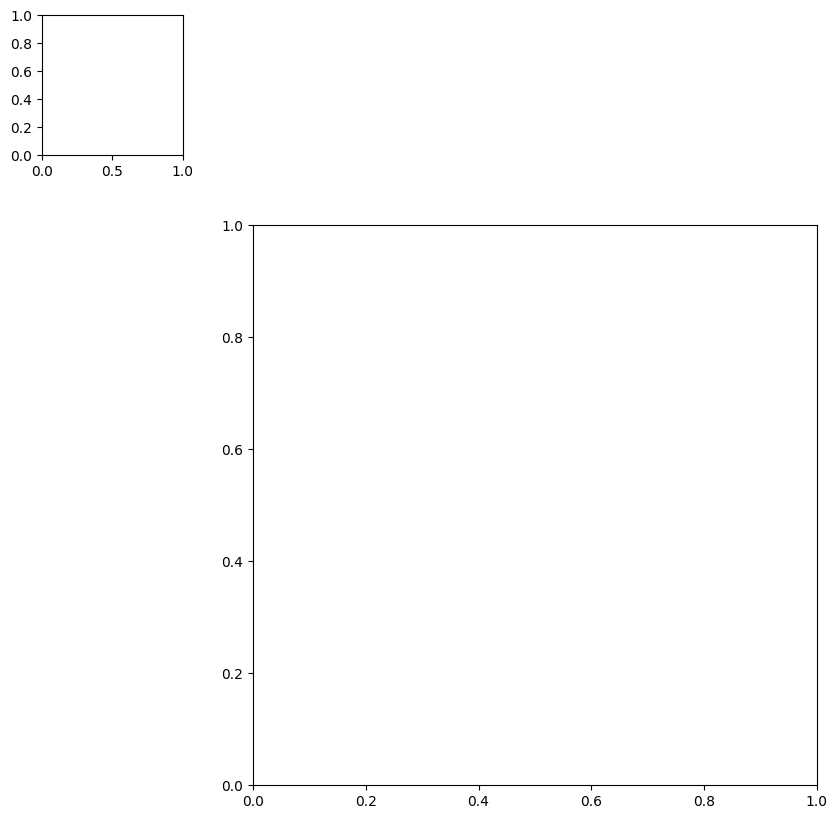

In [ ]:
!pip install pandas
!pip install numpy

!pip install matplotlib
!pip install seaborn
!pip install plotly

import pandas as pd
import numpy as np

df= pd.read_csv('all-menu.csv')

print("Top 5 entries:")
print (df.head(5))

print(df.dtypes)

print("Bottom 5 entries:")
print (df.tail(5))

import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py

#Line Graph
plt.title(' Line Graph ')
plt.xlabel('Beverage', fontsize=15)
plt.ylabel('Calories', fontsize=15)
plt.plot(df['Beverage'], df['Calories'],marker='o', color='blue',markeredgewidth='0.5', markeredgecolor='black', markerfacecolor='green')
plt.xticks(rotation=60, ha='right') # to prevent overlaping of text
plt.figure(figsize=(16, 16))

#Bar plot
beverage_category_unique = df['Beverage_category'].unique()
values = df['Beverage_category'].value_counts().to_list()
plt.bar(x=beverage_category_unique, height=values)
plt.xticks(rotation=60, ha='right') # to prevent overlaping of text
plt.xlabel('Beverage Category')
plt.ylabel('Counts')
plt.title('Counts of Each Beverage Category')

#Boxplot

sns.boxplot(data=df[['Calories', ' Sugars (g)']], color='orange')

#Count plot
sns.countplot(x='Beverage_prep', data=df.reset_index())
plt.xticks(rotation=60, ha='right') # to prevent overlaping of text
plt.title('Counts of Each Beverage Preparation')

#Scatter plot
sns.scatterplot(df[['Trans Fat (g) ', 'Saturated Fat (g)']], edgecolor='black')

#3D Scatter Plot
from mpl_toolkits.mplot3d import Axes3D
data = df[['Calories', ' Sugars (g)']]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['Calories'], data[' Sugars (g)'])
plt.show()

#Bubble scatter
plt.scatter(df['Calories'], df[' Sugars (g)'], s=df['Cholesterol (mg)']*0.5, edgecolor='black')

#Histogram
plt.hist(df[' Total Carbohydrates (g) '], bins=10, edgecolor='black')

#Violin plot
sns.violinplot(data=df[['Calories', ' Sugars (g)']])

#heatmap
crr_ = df[['Calories', ' Sugars (g)', ' Sodium (mg)', ' Dietary Fibre (g)']].corr()
sns.heatmap(crr_, cmap='coolwarm', annot=True)

#KDE Plot
sns.kdeplot(df[' Dietary Fibre (g)'])

plt.figure(figsize=(10,5))
sns.distplot(df[' Sugars (g)'], bins=10, kde=True, color='#0f5a3e')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Count of Categories', fontsize=20, color='Red')
plt.show()

!pip install wordcloud

from wordcloud import WordCloud


all_words = ' '.join(df['Beverage_category'].dropna().astype(str).tolist())


plt.figure(figsize=(10,5))
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(all_words)
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('WordCloud', fontsize=15, color='blue')
plt.axis('off')
plt.show()


#jointplot
sns.jointplot(data=df, x='Calories', y=' Protein (g) ', kind='hex', color='#0f5a3e')
plt.xlabel('Calories')
plt.ylabel('Total Fat')
plt.xticks(rotation=90)
plt.yticks(rotation=90)
plt.show()


!pip install scipy
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from scipy.spatial.distance import pdist
import numpy as np

df_plot = df.drop('Beverage_category', axis=1)
df_pl=df_plot.drop('Beverage', axis=1)
df_final=df_pl.drop('Beverage_prep', axis=1)
plt.figure(figsize=(10,5))
link = linkage(df_plot, 'ward')
dendrogram(link, color_threshold=5, truncate_mode='lastp', p=10)
plt.xticks(rotation=90)
plt.title('Dendrogram Plot', fontsize=20, color='red')
plt.show()

plt.figure(figsize=(10,5))
sns.clustermap(df_final)
plt.show()
